# Graficas de resultados

Obtiene diversas gráficas a partir de los datos en `data/output/Results.csv`:

- mapas de zonas climáticas TMY:

    - `data/output/plots/zc-tmy.png`

- mapas de zonas climáticas CTE:

    - `data/output/plots/zc-cte.png`

- mapas de diferencias en zonificación:

    - `data/output/plots/zc-diff.png`

- Histograma de magnitud de las diferencias entre zonificaciones:

    - `data/output/plots/zci-diff-hist.png`
    - `data/output/plots/zcv-diff-hist.png`


In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rcParams.update({
#   "text.usetex": False,
  "font.family": "Arial"
})

BASEDIR = "../"

try:
    running_under_snakemake = snakemake
    if running_under_snakemake:
        BASEDIR = "./"
except:
    pass

RESULTSFILE = BASEDIR + "data/output/Results.csv"

In [15]:
df = pd.read_csv(
    RESULTSFILE,
    sep=",",
    decimal=".",
    dtype={
        "COD_INE": str,
        "COD_PROV": str,
        "PROVINCIA": str,
        "NOMBRE_ACTUAL": str,
        "NOMBRE_ACTUAL": str,
        "POBLACION_MUNI": int,
        "LATITUD_ETRS89": float,
        "ALTITUD": float,
        "ARCHIVO_TMY": str,
        "ZC_CTE_2019": str,
        "ZCI_CTE_2019": str,
        "ZCV_CTE_2019": str,
        "GD_I": float,
        "GD_V": float,
        "n_N": float,
        "SCI": float,
        "SCV": float,
        "ZCI_TMY": str,
        "ZCV_TMY": str,
        "ZCI_DIFF": int,
        "ZCV_DIFF": int,
    },
)

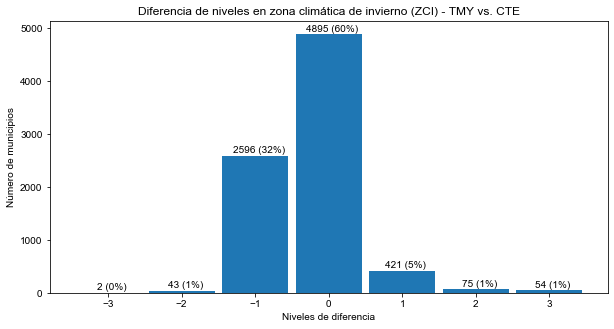

In [16]:
# bins = np.arange(-4, 4) - 0.5
bins = np.arange(df.ZCI_DIFF.min(), df.ZCI_DIFF.max()) - 0.5
count = df.ZCI_DIFF.count()

fig, ax = plt.subplots()
# fig, (ax1, ax2) = plt.subplots(2, 1)
df.ZCI_DIFF.plot(
    kind="hist",
    bins=bins,
    rwidth=0.9,
    color="tab:blue",
    figsize=(10, 5),
    ax=ax,
)

ax.set_title("Diferencia de niveles en zona climática de invierno (ZCI) - TMY vs. CTE")
ax.set_xlabel("Niveles de diferencia")
ax.set_ylabel("Número de municipios")
for bar in ax.patches:
    ax.text(
        bar.xy[0] + 0.5,
        bar.get_height() + 10,
        "{number:.0f} ({pct:.0f}%)".format(
            number=int(bar.get_height()), pct=bar.get_height() / count * 100
        ),
        ha="center",
        va="bottom",
    )
ax.figure.savefig(BASEDIR + "data/output/plots/zci-diff-hist.png")
ax


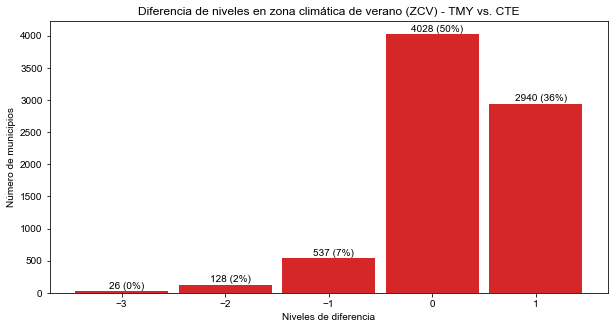

In [17]:
bins = np.arange(df.ZCV_DIFF.min(), df.ZCV_DIFF.max()) - 0.5

fig, ax = plt.subplots()
df.ZCV_DIFF.plot(
    kind="hist",
    bins=bins,
    rwidth=0.9,
    color="tab:red",
    figsize=(10, 5),
    ax=ax,
)

ax.set_title("Diferencia de niveles en zona climática de verano (ZCV) - TMY vs. CTE")
ax.set_xlabel("Niveles de diferencia")
ax.set_ylabel("Número de municipios")
for bar in ax.patches:
    ax.text(
        bar.xy[0] + 0.5,
        bar.get_height() + 10,
        "{number:.0f} ({pct:.0f}%)".format(
            number=int(bar.get_height()), pct=bar.get_height() / count * 100
        ),
        ha="center",
        va="bottom",
    )
ax.figure.savefig(BASEDIR + "data/output/plots/zcv-diff-hist.png")
ax


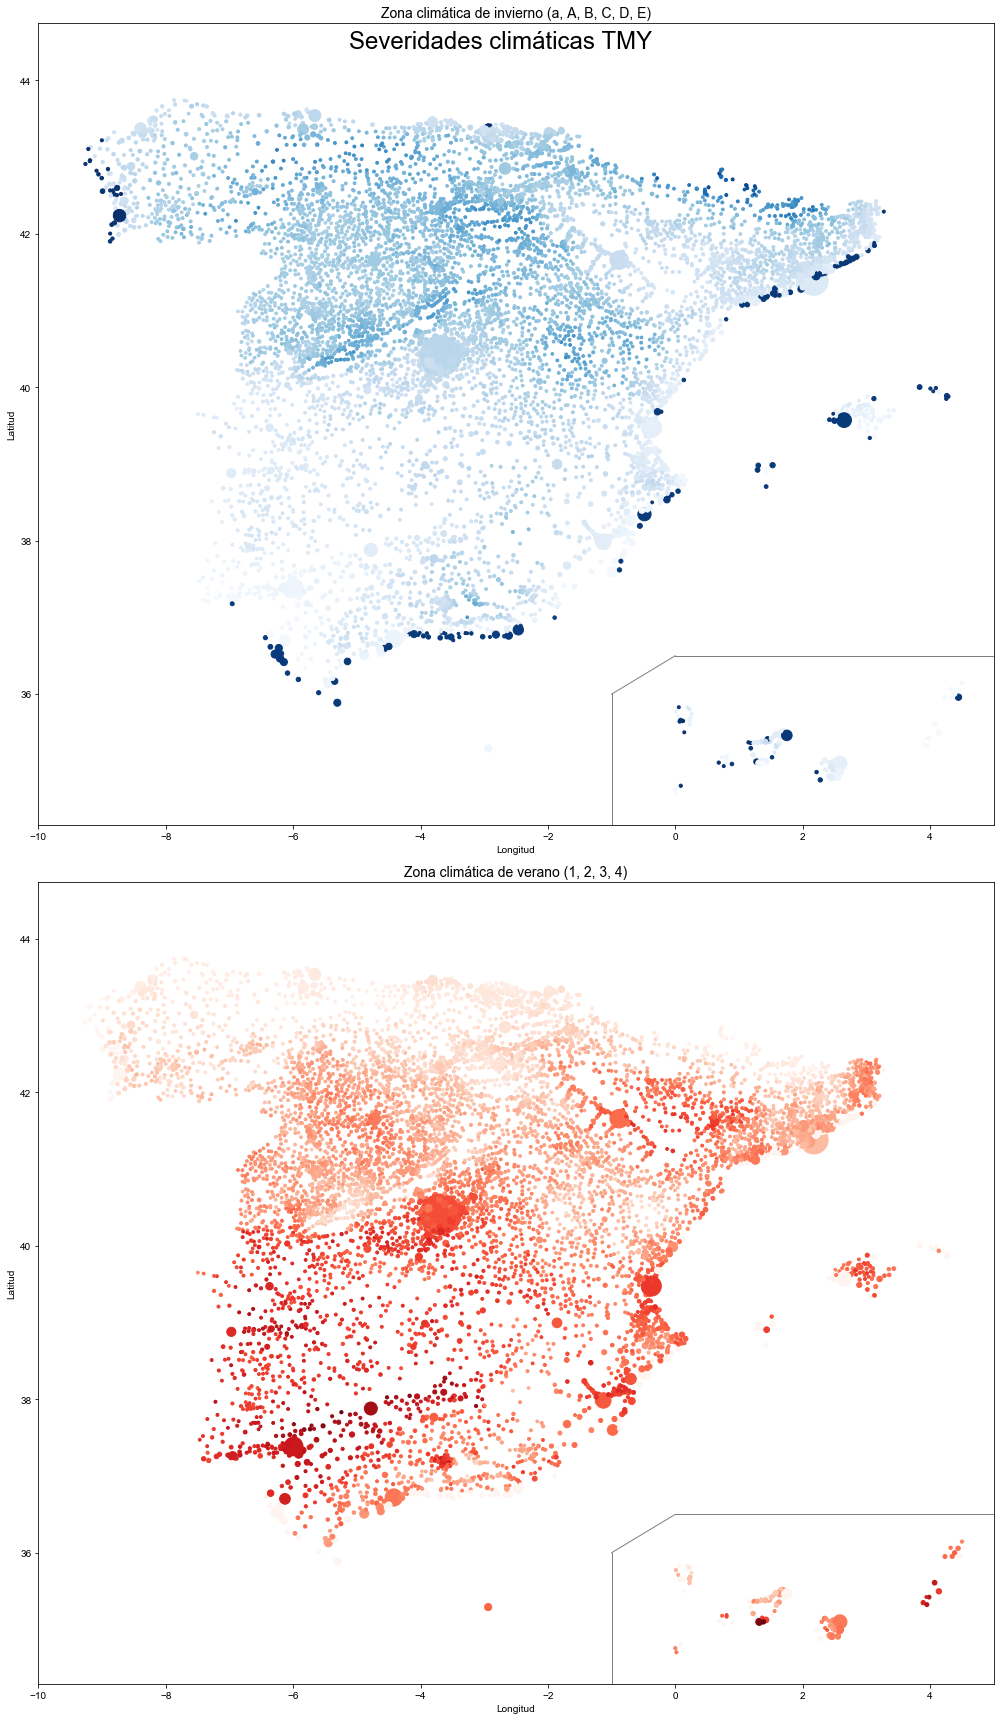

In [18]:
# Zonas climáticas a partir de TMY

peninsula = df[df.LATITUD_ETRS89 > 30]
canarias = df[df.LATITUD_ETRS89 <= 30]
xlim = [-10, 5]
ylim = [peninsula.LATITUD_ETRS89.min() - 1, peninsula.LATITUD_ETRS89.max() + 1]

fig = plt.figure(figsize=(14, 24))
fig.suptitle("Severidades climáticas TMY", size=24)
fig.subplots_adjust(top=0.95, hspace=0.1)
gs = mpl.gridspec.GridSpec(2, 1)  # , width_ratios=[3, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0, sharey=ax0)

ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_ylabel("Latitud")
ax0.set_xlabel("Longitud")
ax0.set_title("Zona climática de invierno (a, A, B, C, D, E)", size=14)
ax1.set_ylabel("Latitud")
ax1.set_xlabel("Longitud")
ax1.set_title("Zona climática de verano (1, 2, 3, 4)", size=14)

ax0.scatter(
    peninsula["LONGITUD_ETRS89"],
    peninsula["LATITUD_ETRS89"],
    c=peninsula.SCI,
    s=8.0 + peninsula["POBLACION_MUNI"] / 2000.0,
    cmap=mpl.cm.Blues,
)

ax0.scatter(
    canarias["LONGITUD_ETRS89"] + 18,
    canarias["LATITUD_ETRS89"] + 7,
    c=canarias.SCI,
    s=8.0 + canarias["POBLACION_MUNI"] / 2000.0,
    cmap=mpl.cm.Blues,
)

ax0.add_line(mpl.lines.Line2D([-1, -1], [34, 36], lw=1, color="gray", axes=ax0))
ax0.add_line(mpl.lines.Line2D([-1, 0], [36, 36.5], lw=1, color="gray", axes=ax0))
ax0.add_line(mpl.lines.Line2D([0, 5], [36.5, 36.5], lw=1, color="gray", axes=ax0))

ax1.scatter(
    peninsula["LONGITUD_ETRS89"],
    peninsula["LATITUD_ETRS89"],
    c=peninsula.SCV,
    s=8.0 + peninsula["POBLACION_MUNI"] / 2000.0,
    cmap=mpl.cm.Reds,
)

ax1.scatter(
    canarias["LONGITUD_ETRS89"] + 18,
    canarias["LATITUD_ETRS89"] + 7,
    c=canarias.SCV,
    s=8.0 + canarias["POBLACION_MUNI"] / 2000.0,
    cmap=mpl.cm.Reds,
)

ax1.add_line(mpl.lines.Line2D([-1, -1], [34, 36], lw=1, color="gray", axes=ax1))
ax1.add_line(mpl.lines.Line2D([-1, 0], [36, 36.5], lw=1, color="gray", axes=ax1))
ax1.add_line(mpl.lines.Line2D([0, 5], [36.5, 36.5], lw=1, color="gray", axes=ax1))

fig.tight_layout()
fig.savefig(BASEDIR + "data/output/plots/zc-tmy.png")
